In [1]:
# Mount Google Drive

from google.colab import drive

# The following command will prompt a URL for you to click and obtain the
# authorization code

drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Set up data folder
from pathlib import Path
DATA = Path('/content/drive/My Drive/Mutation_Load/data_used')

In [3]:
# install package for BIC and Cox
!pip install RegscorePy
!pip install lifelines

     |████████████████████████████████| 389kB 2.7MB/s 


In [0]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# Training data

The following is commented out because mutation matrix csv has been generated. So we only need to read it in afterwards.

In [0]:
tcga = pd.read_excel(DATA/'TCGA_LUAD.xlsx', header=1)

# Selection of nonsynonymous point mutations and the construction of mutation matrix

## Selection of nonsynonymous point mutations

“Variant_Classification”: select nonsense mutation, nonstop mutation, and missense mutation. 

In [0]:
nonsyn = tcga[tcga['Variant_Classification'].isin([ 'Nonsense_Mutation', 'Nonstop_Mutation', 'Missense_Mutation'])]

## Construction of mutation matrix

"Variant_Type": select SNP, DNP, and TNP (polymorphysm). The mutation counts are 1, 2, and 3, respectively.

In [0]:
poly = nonsyn[nonsyn['Variant_Type'].isin(['SNP', 'DNP', 'TNP'])]

In [0]:
poly = poly[poly.Hugo_Symbol != 'Unknown']

In [0]:
# # create an empty mutation matrix
col = poly['Tumor_Sample_Barcode'].unique()
idx = poly['Hugo_Symbol'].unique()
mutmtx = pd.DataFrame(np.zeros([len(idx), len(col)]), columns=col, index=idx)

# # fill in the mutation matrix
vt = {'SNP': 1, 'DNP': 2, 'TNP': 3}
for _, row in poly.iterrows():
    mutmtx.loc[row.Hugo_Symbol, row.Tumor_Sample_Barcode] += vt[row.Variant_Type]

In [0]:
# mutmtx.to_csv(DATA/'mutmtx.csv')

This is the mutation matrix defined from the paper (13,526 genes and 230 patients). Mutation matrix has been saved to csv. Just load the csv from now on.

In [10]:
#mutmtx = pd.read_csv(DATA/'mutmtx.csv', index_col=0)
# remove genes that they do not exist in validation data and otherwise would be selected
mutmtx = mutmtx.drop(['ZNF521', 'KMT2C', 'ADGRG4', 'COL6A3', 'ERICH3', 'NOTCH4', 'RIMS2'])
mutmtx.head()

,TCGA-05-4249-01A-01D-1105-08,TCGA-05-4382-01A-01D-1265-08,TCGA-05-4384-01A-01D-1753-08,TCGA-05-4389-01A-01D-1265-08,TCGA-05-4390-01A-02D-1753-08,TCGA-05-4395-01A-01D-1265-08,TCGA-05-4396-01A-21D-1855-08,TCGA-05-4398-01A-01D-1265-08,TCGA-05-4402-01A-01D-1265-08,TCGA-05-4403-01A-01D-1265-08,TCGA-05-4405-01A-21D-1855-08,TCGA-05-4410-01A-21D-1855-08,TCGA-05-4415-01A-22D-1855-08,TCGA-05-4417-01A-22D-1855-08,TCGA-05-4418-01A-01D-1265-08,TCGA-05-4420-01A-01D-1265-08,TCGA-05-4422-01A-01D-1265-08,TCGA-05-4424-01A-22D-1855-08,TCGA-05-4425-01A-01D-1753-08,TCGA-05-4426-01A-01D-1265-08,TCGA-05-4430-01A-02D-1265-08,TCGA-05-4432-01A-01D-1265-08,TCGA-05-4433-01A-22D-1855-08,TCGA-05-5420-01A-01D-1625-08,TCGA-05-5423-01A-01D-1625-08,TCGA-05-5428-01A-01D-1625-08,TCGA-05-5429-01A-01D-1625-08,TCGA-05-5715-01A-01D-1625-08,TCGA-35-3615-01A-01D-1040-01,TCGA-38-4626-01A-01D-1553-08,TCGA-38-4627-01A-01D-1553-08,TCGA-38-4628-01A-01D-1265-08,TCGA-38-4631-01A-01D-1753-08,TCGA-38-4632-01A-01D-1753-08,TCGA-38-6178-01A-11D-1753-08,TCGA-44-2655-01A-01D-1553-08,TCGA-44-2656-01A-02W-0928-08,TCGA-44-2657-01A-01D-1105-08,TCGA-44-2659-01A-01D-0969-08,TCGA-44-2661-01A-01D-1105-08,TCGA-44-2662-01A-01D-0969-08,TCGA-44-2665-01A-01D-1040-01,TCGA-44-2666-01A-01D-1489-08,TCGA-44-3396-01A-01D-1265-08,TCGA-44-3919-01A-02D-1458-08,TCGA-44-4112-01A-01D-1105-08,TCGA-44-5645-01A-01D-1625-08,TCGA-44-6145-01A-11D-1753-08,TCGA-44-6146-01A-11D-1753-08,TCGA-44-6147-01A-11D-1753-08,TCGA-44-6774-01A-21D-1855-08,TCGA-44-6775-01A-11D-1855-08,TCGA-44-6776-01A-11D-1855-08,TCGA-44-6777-01A-11D-1855-08,TCGA-44-6779-01A-11D-1855-08,TCGA-44-7659-01A-11D-2063-08,TCGA-44-7662-01A-11D-2063-08,TCGA-44-7670-01A-11D-2063-08,TCGA-44-7671-01A-11D-2063-08,TCGA-44-7672-01A-11D-2063-08,TCGA-49-4486-01A-01D-1265-08,TCGA-49-4487-01A-21D-1855-08,TCGA-49-4488-01A-01D-1753-08,TCGA-49-4490-01A-21D-1855-08,TCGA-49-4494-01A-01D-1265-08,TCGA-49-4501-01A-01D-1265-08,TCGA-49-4505-01A-01D-1265-08,TCGA-49-4506-01A-01D-1265-08,TCGA-49-4507-01A-01D-1265-08,TCGA-49-4510-01A-01D-1265-08,TCGA-49-4512-01A-21D-1855-08,TCGA-49-4514-01A-21D-1855-08,TCGA-49-6742-01A-11D-1855-08,TCGA-49-6744-01A-11D-1855-08,TCGA-49-6745-01A-11D-1855-08,TCGA-49-6761-01A-31D-1945-08,TCGA-49-6767-01A-11D-1855-08,TCGA-50-5044-01A-21D-1855-08,TCGA-50-5049-01A-01D-1625-08,TCGA-50-5051-01A-21D-1855-08,TCGA-50-5055-01A-01D-1625-08,TCGA-50-5068-01A-01D-1625-08,TCGA-50-5072-01A-21D-1855-08,TCGA-50-5931-01A-11D-1753-08,TCGA-50-5932-01A-11D-1753-08,TCGA-50-5933-01A-11D-1753-08,TCGA-50-5935-01A-11D-1753-08,TCGA-50-5936-01A-11D-1625-08,TCGA-50-5939-01A-11D-1625-08,TCGA-50-5941-01A-11D-1753-08,TCGA-50-5942-01A-21D-1753-08,TCGA-50-5944-01A-11D-1753-08,TCGA-50-6593-01A-11D-1753-08,TCGA-50-6595-01A-12D-1855-08,TCGA-50-6597-01A-11D-1855-08,TCGA-50-6673-01A-11D-1945-08,TCGA-50-7109-01A-11D-2036-08,TCGA-53-7626-01A-12D-2063-08,TCGA-53-7813-01A-11D-2167-08,TCGA-55-1592-01A-01D-0969-08,TCGA-55-1594-01A-01D-1040-01,TCGA-55-1596-01A-01D-1040-01,TCGA-55-6543-01A-11D-1753-08,TCGA-55-6642-01A-11D-1855-08,TCGA-55-6712-01A-11D-1855-08,TCGA-55-6970-01A-11D-1945-08,TCGA-55-6971-01A-11D-1945-08,TCGA-55-6972-01A-11D-1945-08,TCGA-55-6978-01A-11D-1945-08,TCGA-55-6979-01A-11D-1945-08,TCGA-55-6980-01A-11D-1945-08,TCGA-55-6981-01A-11D-1945-08,TCGA-55-6982-01A-11D-1945-08,TCGA-55-6983-01A-11D-1945-08,TCGA-55-6985-01A-11D-1945-08,TCGA-55-6986-01A-11D-1945-08,TCGA-55-7281-01A-11D-2036-08,TCGA-55-7283-01A-11D-2036-08,TCGA-55-7573-01A-11D-2036-08,TCGA-55-7574-01A-11D-2036-08,TCGA-55-7576-01A-11D-2063-08,TCGA-55-7724-01A-11D-2167-08,TCGA-55-7725-01A-11D-2167-08,TCGA-55-7726-01A-11D-2167-08,TCGA-55-7727-01A-11D-2167-08,TCGA-55-7728-01A-11D-2184-08,TCGA-55-7815-01A-11D-2167-08,TCGA-55-7903-01A-11D-2167-08,TCGA-55-7907-01A-11D-2167-08,TCGA-55-7911-01A-11D-2167-08,TCGA-55-7914-01A-11D-2167-08,TCGA-64-1676-01A-01D-0969-08,TCGA-64-1677-01A-01W-0928-08,TCGA-64-1678-01A-01W-0928-08,TCGA-64-1679-01A-21D-2063-08,TCGA-64-1680-01A-02D-0969-08,TCGA-64-1681-01A-11D-2063-08,TCGA-64-5774-01A-01D-1625-

# Validation data

## Imielinski et al. (n=181)

The original data has 183 patitents, but after keeping only the nonsynonymous point mutations, it is 181 patients. This matches the 181 patients used in the paper.

In [0]:
val183 = pd.read_csv(DATA/'ValidationDataN183.txt',sep="\t", comment='#', low_memory=False)

In [0]:
val183_nonsyn = val183[val183['Variant_Classification'].isin([ 'Nonsense_Mutation', 'Nonstop_Mutation', 'Missense_Mutation'])]
val183_poly = val183_nonsyn[val183_nonsyn['Variant_Type'].isin(['SNP', 'DNP', 'TNP'])]

In [0]:
# create an empty mutation matrix
val183_col = val183_poly['Tumor_Sample_Barcode'].unique()
val183_idx = val183_poly['Hugo_Symbol'].unique()
val183_mutmtx = pd.DataFrame(np.zeros([len(val183_idx), len(val183_col)]), 
                             columns=val183_col, index=val183_idx)

# fill in the mutation matrix
vt = {'SNP': 1, 'DNP': 2, 'TNP': 3}
for _, row in val183_poly.iterrows():
    val183_mutmtx.loc[row.Hugo_Symbol, row.Tumor_Sample_Barcode] += vt[row.Variant_Type]

## Rizvi et al. (n=34)

The original data has 34 patients, but some patients left the program or had no overlapping data between the two forms. After removing such invalid patients information, there are 30 patients left. This matches the 30 patients used in the paper.

In [0]:
# Mutation data
val34 = pd.read_excel(DATA/'ValidationDataN34_mut.xlsx', header=6)

In [0]:
# Immuno-therapy response data
xlsl = pd.read_excel(DATA/'ValidationDataN34_Immuno_Response.xlsx', header=1, index_col=1, skipfooter=13)

In [0]:
# following the paper, only keep patients with DCB and NDB
therapy = xlsl[xlsl['Durable Clinical Benefit'].isin(['DCB', 'NDB'])]
therapy = therapy[therapy.index.isin(val34.Sample.unique())]

In [0]:
# go back to remove patients without immuno-response data out of mutation data
val34_valid = val34[val34.Sample.isin(therapy.index)]

In [0]:
# create an empty mutation matrix
val34_col = val34_valid['Sample'].unique()
val34_idx = val34_valid['Gene'].unique()
val34_mutmtx = pd.DataFrame(np.zeros([len(val34_idx), len(val34_col)]), 
                             columns=val34_col, index=val34_idx)

# fill in the mutation matrix
for _, row in val34_valid.iterrows():
    val34_mutmtx.loc[row.Gene, row.Sample] += 1

# For elastic net - Candidate gene selection (CGS) 

1)	mutation frequency ≥ 10%,

2)	coding DNA sequence (CDS) length ≤ 15,000, 

3)	Bonferroni corrected p-value < 0.05 in Wilcoxon test.

Construct a table with each row being a gene and three main columns: Mut_Freq, CDS, P_Value. An additional column EntrezGeneID is kept to be consistant with the paper.


### Mutation frequency

In [0]:
# get mutation frequency
cgs = pd.DataFrame(index=mutmtx.index, columns=['Mut_Freq'])
cgs.Mut_Freq = mutmtx.sum(axis=1)/mutmtx.shape[1]

### DNA sequence length

In [0]:
# get DNA sequence length (CDS)
cds_len = pd.read_excel(DATA/'CDS_Length.xlsx')
# Remove duplicate rows for easy processing
cds_len.drop_duplicates(subset='GeneName', keep='first', inplace=True)
# set 'GeneName' column as index
cds_len.set_index('GeneName', inplace=True)
# the resulting table should be 54070 rows

In [0]:
# trim cds_len to contain only the genes in cgs
cds_len_trim = cds_len[cds_len.index.isin(cgs.index)]

In [0]:
# sort cds_len_trim indexes (GeneName) to the same order as cgs
cds_len_sort = cds_len_trim.reindex(cgs.index)

In [0]:
# finally, add 'CDS' column to cgs table
cgs['CDS'] = cds_len_sort['CDS length']
# also keep the EntrezGeneID because the original paper has it
cgs['EntrezGeneID'] = cds_len_sort['EntrezGeneID']

### Wilcoxon test

In [0]:
# use ranksums() function in python, not wilcoxon() function
# wilcoxon() function is the non-parametric equivalency of paired-ttest, which
# does not apply to this case
from scipy.stats import ranksums

# For each gene, 
# one vector contains the mutation loads of patients that have a mutation in that gene;
# the other vector contains the mutation loads of petients that do not have a mutation in that gene.

In [0]:
# first calculate the mutation load for each patient
mut_load = mutmtx.sum(axis=0)

In [0]:
# loop through each gene to get muted (pov) and not muted (neg)
cgs['P_Value'] = 0   #add a column called P_Value

for index, row in mutmtx.iterrows():
    pov = np.array(row>0)
    neg = np.array(row==0) 
    cgs.loc[index, 'P_Value'] = ranksums(mut_load[pov], mut_load[neg])[1]  # ranksums returns two values: 
    # the first is statistics; the second is the p value. We want p value.

In [125]:
# CDS column has '-' in some cells, which are invalid
cgs.CDS[cgs.CDS=='-'] = np.nan
# remove genes with NaN from cgs
cgs_nona = cgs.dropna()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
# get selected genes based the three criteria
# notice the original author used the Bonferroni-corrected p value
selected = cgs_nona.loc[(cgs_nona.Mut_Freq >= 0.1) & 
                        (cgs_nona.CDS.astype(int) <= 15000) & 
                        (cgs_nona.P_Value < 0.05/mutmtx.shape[0])]

In [127]:
# # print out all selected genes to double check
for i in range(len(selected)): 
     print(selected.index[i])

FLG
TNR
RYR2
NALCN
ZNF208
APOB
NRXN1
FAT4
ADAMTS12
LAMA2
RELN
RP1L1
CSMD3
PTPRD
COL11A1
HRNR
FLG2
PAPPA2
ASTN1
ASPM
GPR158
PCDH15
SORCS1
NAV3
RYR3
DNAH3
MYH1
DNAH9
ZNF536
CNTNAP5
LRP1B
XIRP2
LRP2
ZNF804A
CPS1
TSHZ2
SI
ANK2
CDH12
CDH10
PKHD1
HGF
MUC17
PXDNL
ZFHX4
PKHD1L1
FAM135B
SVEP1
MXRA5
FAM47C
PCDH11X
TAF1L
TPTE
CSMD2
CACNA1E
ZNF831
FBN2
DOCK2
SORCS3
ASXL3
CNTNAP2
COL3A1
PRDM9
PRUNE2
PLCB1


In [128]:
# double check selected genes all exist in the small set of validation data
np.sort(selected.index[selected.index.isin(val34_mutmtx.index.unique())])

array(['ADAMTS12', 'ANK2', 'APOB', 'ASPM', 'ASTN1', 'ASXL3', 'CACNA1E',
       'CDH10', 'CDH12', 'CNTNAP2', 'CNTNAP5', 'COL11A1', 'COL3A1',
       'CPS1', 'CSMD2', 'CSMD3', 'DNAH3', 'DNAH9', 'DOCK2', 'FAM135B',
       'FAM47C', 'FAT4', 'FBN2', 'FLG', 'FLG2', 'GPR158', 'HGF', 'HRNR',
       'LAMA2', 'LRP1B', 'LRP2', 'MUC17', 'MXRA5', 'MYH1', 'NALCN',
       'NAV3', 'NRXN1', 'PAPPA2', 'PCDH11X', 'PCDH15', 'PKHD1', 'PKHD1L1',
       'PLCB1', 'PRDM9', 'PRUNE2', 'PTPRD', 'PXDNL', 'RELN', 'RP1L1',
       'RYR2', 'RYR3', 'SI', 'SORCS1', 'SORCS3', 'SVEP1', 'TAF1L', 'TNR',
       'TPTE', 'TSHZ2', 'XIRP2', 'ZFHX4', 'ZNF208', 'ZNF536', 'ZNF804A',
       'ZNF831'], dtype=object)

In [129]:
len(selected.index[selected.index.isin(val34_mutmtx.index.unique())])

65

In [130]:
np.sort(selected.index)

array(['ADAMTS12', 'ANK2', 'APOB', 'ASPM', 'ASTN1', 'ASXL3', 'CACNA1E',
       'CDH10', 'CDH12', 'CNTNAP2', 'CNTNAP5', 'COL11A1', 'COL3A1',
       'CPS1', 'CSMD2', 'CSMD3', 'DNAH3', 'DNAH9', 'DOCK2', 'FAM135B',
       'FAM47C', 'FAT4', 'FBN2', 'FLG', 'FLG2', 'GPR158', 'HGF', 'HRNR',
       'LAMA2', 'LRP1B', 'LRP2', 'MUC17', 'MXRA5', 'MYH1', 'NALCN',
       'NAV3', 'NRXN1', 'PAPPA2', 'PCDH11X', 'PCDH15', 'PKHD1', 'PKHD1L1',
       'PLCB1', 'PRDM9', 'PRUNE2', 'PTPRD', 'PXDNL', 'RELN', 'RP1L1',
       'RYR2', 'RYR3', 'SI', 'SORCS1', 'SORCS3', 'SVEP1', 'TAF1L', 'TNR',
       'TPTE', 'TSHZ2', 'XIRP2', 'ZFHX4', 'ZNF208', 'ZNF536', 'ZNF804A',
       'ZNF831'], dtype=object)

In [131]:
len(selected.index)

65

# Construction of the mutation load estimation model
1. Data processing
2. Feature selection by Lasso and train a linear regression model
3. Lasso regression based on the pre-filtered features
4. Elastic net based on the pre-filtered features



## Data processing

### For Lasso feature selection
All the genes shared between the training data and the testing data are used for feature selection

In [115]:
#mutation matrix with genes overlapping the test data
mutmtx_overlap = mutmtx[mutmtx.index.isin(val183_mutmtx.index) & 
                        mutmtx.index.isin(val34_mutmtx.index)]

# define the mutation matrix that contains shared genes
x = mutmtx_overlap.transpose() 
y = mut_load.transpose()

#for the feature selection by Lasso
x_r = x
model_gene=list(x_r.columns)
print("Number of genes used in the model:", len(model_gene))

#validation data processing
#x_val183
val183_model = val183_mutmtx[val183_mutmtx.index.isin(model_gene)]
val183_model = val183_model.reindex(x_r.columns)
val183_model = val183_model.transpose()
#x_val34
val34_model = val34_mutmtx[val34_mutmtx.index.isin(model_gene)]
val34_model = val34_model.reindex(x_r.columns)
val34_model = val34_model.transpose()
#y_val183
val183_mut_load = val183_mutmtx.sum(axis=0)
#y_val34
val34_mut_load = val34_mutmtx.sum(axis=0)

# concatenate the matrix with model genes and patients. x
concat_model = pd.concat([val183_model, val34_model])

# concatenate the mutation load information. y
concat_mut_load = pd.concat([val183_mut_load, val34_mut_load])


Number of genes used in the model: 3668


### For elastic net 
All the 65 genes filtered according to the criteria in the paper are used to train a Lasso regression model and a elastic net model.

In [133]:
x = mutmtx[mutmtx.index.isin(selected.index)].transpose() # mutation matrix with only selected genes
y = mut_load.transpose()

#define genes for the test data
x_r = x
model_gene=list(x_r.columns)
print("Number of genes used in the model:", len(model_gene))

#validation data processing
#x_val183
val183_model = val183_mutmtx[val183_mutmtx.index.isin(model_gene)]
val183_model = val183_model.reindex(x_r.columns)
val183_model = val183_model.transpose()
#x_val34
val34_model = val34_mutmtx[val34_mutmtx.index.isin(model_gene)]
val34_model = val34_model.reindex(x_r.columns)
val34_model = val34_model.transpose()
#y_val183
val183_mut_load = val183_mutmtx.sum(axis=0)
#y_val34
val34_mut_load = val34_mutmtx.sum(axis=0)

# concatenate the matrix with model genes and patients. x
concat_model = pd.concat([val183_model, val34_model])

# concatenate the mutation load information. y
concat_mut_load = pd.concat([val183_mut_load, val34_mut_load])


Number of genes used in the model: 65


# **Model training**

## Define functions for model evaluation

In [0]:
def performance_training(model,x,y):
  import matplotlib.pyplot as plt
  from sklearn.metrics import r2_score

  y_pred = model.predict(x)

  r2=model.score(x,y)

  # This corresponds to Fig.2 in the supplementary material (NOT Fig.2 in the paper)
  fig, ax = plt.subplots(dpi=150, figsize=(5, 5))
  plt.plot([0, 1400], [0, 1400], linestyle='-', color='gray')
  plt.plot(y, y_pred, '.')
  ax.text(50, 1200, f"$R^2$={r2}")
  plt.xlabel('Actual mutation load')
  plt.ylabel('Estimated mutation load')
  plt.axis([0, 1400, 0, 1400])

In [0]:
def performance_validation(model):
  
  import matplotlib.pyplot as plt
  from sklearn.metrics import r2_score
 
  concat_model = pd.concat([val183_model, val34_model])
  concat_pred = model.predict(concat_model)
  concat_r2 = r2_score(concat_mut_load, concat_pred)
  print('R2 score of concatenated testing data is {}'.format(round(concat_r2,3)))

  val34_pred=model.predict(val34_model)
  print('R2 score of val34 data is {}'.format(round(r2_score(val34_mut_load,val34_pred),3)))

  val183_pred=model.predict(val183_model)
  print('R2 score of val183 data is {}'.format(round(r2_score(val183_mut_load,val183_pred),3)))

  fig, ax = plt.subplots(dpi=150, figsize=(5, 5))
  plt.plot([0, 3000], [0, 3000], linestyle='-', color='gray')
  plt.plot(val183_mut_load, val183_pred, '.', color='orange', label='Imielinski et al.')
  plt.plot(val34_mut_load, val34_pred, '.', color='purple', label='Rizvi et al.')
  ax.text(100, 2400, f"$R^2$={round(concat_r2, 4)}")
  plt.legend(loc='upper left')
  plt.xlabel('Actual mutation load')
  plt.ylabel('Estimated mutation load')
  plt.axis([0, 3000, 0, 3000])


## **Lasso + Linear Regression**

### Select top 25 features by Lasso

In [0]:
# model training
from sklearn.linear_model import LassoCV
model_lasso2=LassoCV(alphas = [10],cv=5).fit(x, y)
model_lasso2.alpha_

In [78]:
#select top 25 features
coef = pd.Series(model_lasso2.coef_, index = x.columns)
imp_coef = coef.sort_values(ascending=True).tail(25)
imp_coef.index

Index(['DNAH9', 'RYR2', 'XIRP2', 'PTPRD', 'HRNR', 'PCLO', 'LTBP1', 'SORCS1',
       'FLG2', 'USH2A', 'DMD', 'MUC17', 'TRRAP', 'ZFHX4', 'CSMD2', 'MUC16',
       'RELN', 'PXDNL', 'NRXN1', 'FLG', 'NAV3', 'CSMD3', 'LRP1B', 'TTN',
       'ADAMTS12'],
      dtype='object')

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

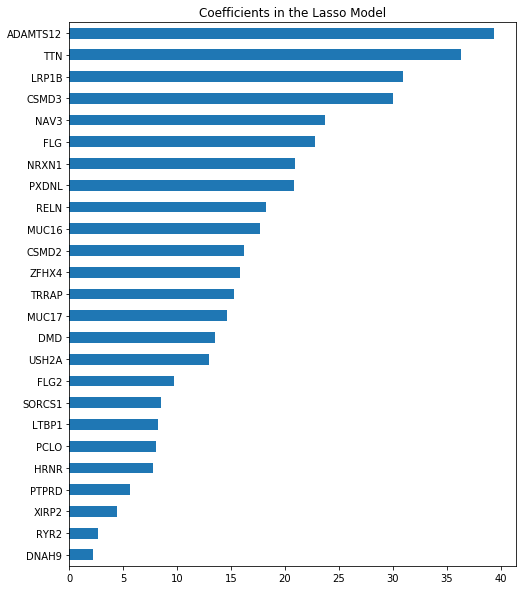

In [79]:
#The coefficients of features
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot( kind = "barh")
plt.title("Coefficients in the Lasso Model")   

### Train a linear regression model with top 25 genes selected

In [0]:
#create a mutation matrix that contains only the gene selected
x_r = mutmtx_overlap[mutmtx_overlap.index.isin(imp_coef.index)].transpose() # each column should be a feature
y = mut_load.transpose()

In [81]:
#train a linear model with the gene selected
from sklearn.linear_model import LinearRegression
estimator_r = LinearRegression()
estimator_r.fit(x_r, y)
model_gene = imp_coef.index
print("Genes and parameters used in mutation load estimation model")
print("Number of genes used in the model:", len(model_gene))
val183_model = val183_mutmtx[val183_mutmtx.index.isin(model_gene)]
val183_model = val183_model.reindex(x_r.columns)
val183_model = val183_model.transpose()
val183_model.head()
val34_model = val34_mutmtx[val34_mutmtx.index.isin(model_gene)]
val34_model = val34_model.reindex(x_r.columns)
val34_model = val34_model.transpose()
val34_model.head()
val183_mut_load = val183_mutmtx.sum(axis=0)
val183_mut_load
val34_mut_load = val34_mutmtx.sum(axis=0)
val34_mut_load[:10]

Genes and parameters used in mutation load estimation model
Number of genes used in the model: 25


AL4602      244.0
AU5884       34.0
BL3403      148.0
CA9903      324.0
DI6359      228.0
DM123062    134.0
GR0134       56.0
GR4788      170.0
HE3202      746.0
JB112852    190.0
dtype: float64

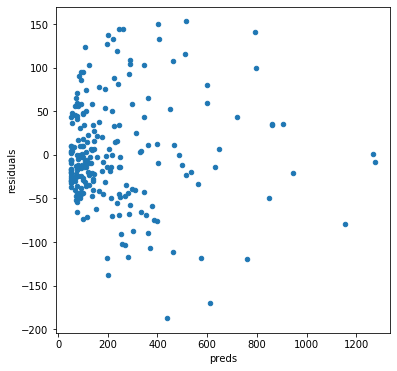

In [82]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":estimator_r.predict(x_r), "true":y}) 
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

### Model evaluation

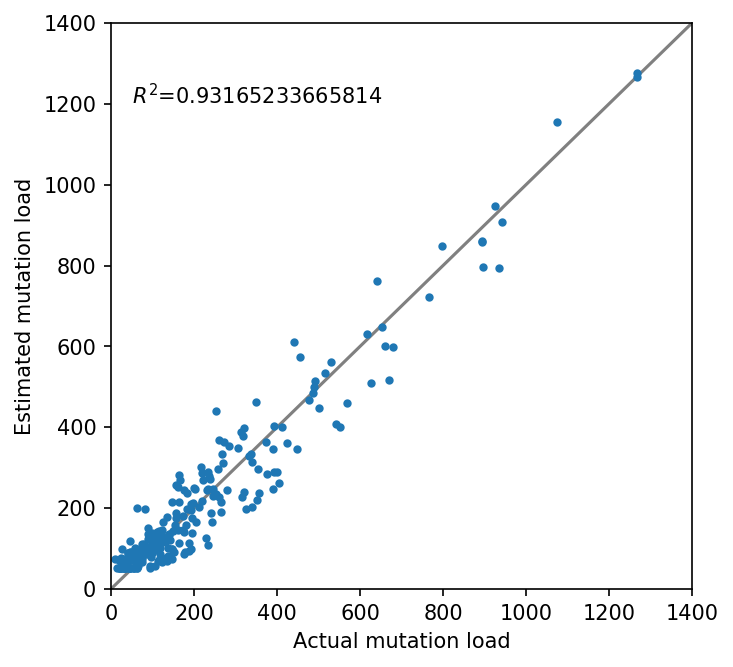

In [83]:
performance_training(estimator_r,x_r,y)

R2 score of concatenated testing data is 0.855
R2 score of val34 data is 0.703
R2 score of val183 data is 0.869


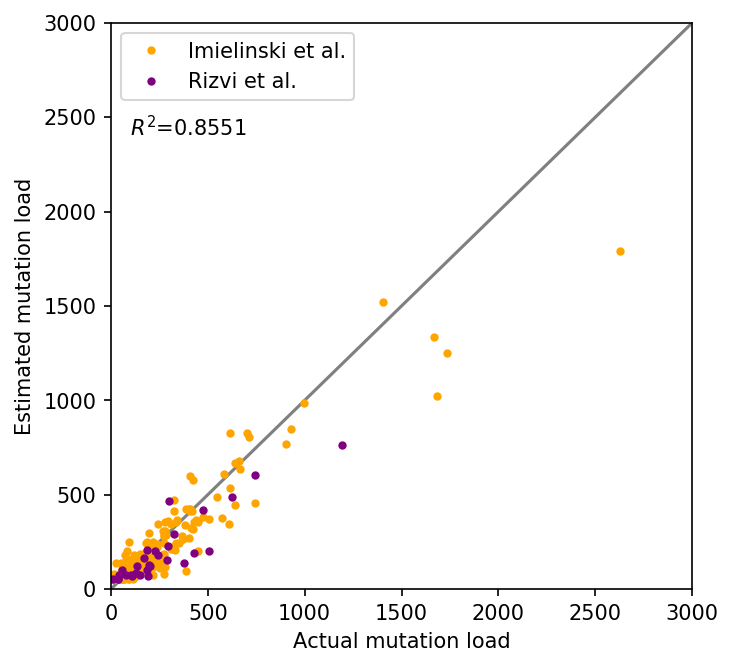

In [84]:
performance_validation(estimator_r)

### Progression-free survial (Fig.2 (b))


In [0]:
val34_pred=estimator_r.predict(val34_model)

In [0]:
# crease a dataframe to store info for pfs plot
val34_df = pd.DataFrame(val34_pred, index=val34_mutmtx.columns, columns=['MutLoad_Pred'])
val34_df['PFS'] = therapy['PFS (mos)']
val34_df['Event'] = therapy['Event']
val34_df = val34_df.sort_values(by=['MutLoad_Pred'])
val34_df = val34_df.dropna()

In [89]:
# define high and low estimated mutation load
high_idx = val34_df.MutLoad_Pred>=150
# The authors used log-rank test for this step (see Materials and Methods - Statistical analaysis)
from lifelines.statistics import logrank_test
sta_result = logrank_test(val34_df.PFS[high_idx], val34_df.PFS[~high_idx])
sta_result.p_value

0.12516720758836528

Text(0, 0.5, 'Progression-free survival (%)')

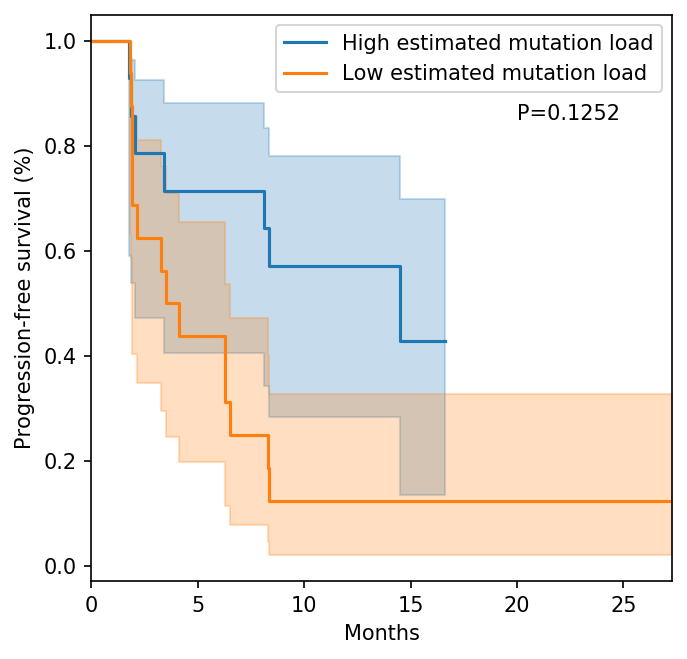

In [90]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=150, figsize=(5, 5))
ax.text(20, 0.85, f"P={round(sta_result.p_value, 4)}")
kmf = KaplanMeierFitter()
kmf.fit(val34_df.PFS[high_idx], val34_df.Event[high_idx], label='High estimated mutation load')
kmf.plot(ax=ax)
kmf.fit(val34_df.PFS[~high_idx], val34_df.Event[~high_idx], label='Low estimated mutation load')
kmf.plot(ax=ax)
plt.xlabel('Months')
plt.ylabel('Progression-free survival (%)')

### Cox proportional-hazards model
Compare Cox proportional-hazards between using acutual mutation load and mutation load predicted by our model.

In [91]:
# CoxPH summary based on predicted mutation load
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(val34_df, duration_col='PFS', event_col='Event')
cph_sum = cph.summary
cph_sum

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p)
MutLoad_Pred,-0.004825,0.995187,0.002282,-0.009296,-0.000353,0.990747,0.999647,-2.114629,0.034462,4.858867


In [0]:
val34_true = val34_df.drop(['MutLoad_Pred'], axis=1)
val34_true['MutLoad'] = val34_mut_load

In [93]:
# CoxPH summary based on actual mutation load
cph_true = CoxPHFitter()
cph_true.fit(val34_true, duration_col='PFS', event_col='Event')
cph_true.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p)
MutLoad,-0.003968,0.99604,0.001688,-0.007276,-0.00066,0.99275,0.99934,-2.350971,0.018725,5.738928


### ROC curve (Fig.2(c))

ROC curve is used to determine the discrimination threshold of DCB (durable clinical benefit) and NDB (no durable benefit).

In [0]:
val34_roc = pd.DataFrame(val34_pred, index=val34_mutmtx.columns, columns=['MutLoad_Pred'])
val34_roc['MutLoad'] = val34_mut_load
val34_roc['DCB'] = therapy['Durable Clinical Benefit']
val34_roc.DCB[val34_roc.DCB=='NR'] = np.nan
val34_roc = val34_roc.dropna()
val34_roc['y_score'] = val34_roc.MutLoad_Pred/max(val34_roc.MutLoad_Pred)
val34_roc.DCB = val34_roc.DCB=='DCB'

In [95]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(val34_roc.DCB, val34_roc.y_score)
np.c_[fpr, tpr, thresholds]

array([[0.        , 0.        , 2.        ],
       [0.        , 0.07142857, 1.        ],
       [0.        , 0.14285714, 0.79167162],
       [0.0625    , 0.14285714, 0.63712312],
       [0.0625    , 0.42857143, 0.29763772],
       [0.125     , 0.42857143, 0.27112965],
       [0.125     , 0.71428571, 0.23429485],
       [0.3125    , 0.71428571, 0.17883515],
       [0.3125    , 0.78571429, 0.16966839],
       [0.375     , 0.78571429, 0.16038926],
       [0.375     , 1.        , 0.1332441 ],
       [0.4375    , 1.        , 0.11052488],
       [0.5625    , 1.        , 0.09877406],
       [0.6875    , 1.        , 0.09587316],
       [0.8125    , 1.        , 0.08958705],
       [1.        , 1.        , 0.06715835]])

[0, 1, 0, 1]

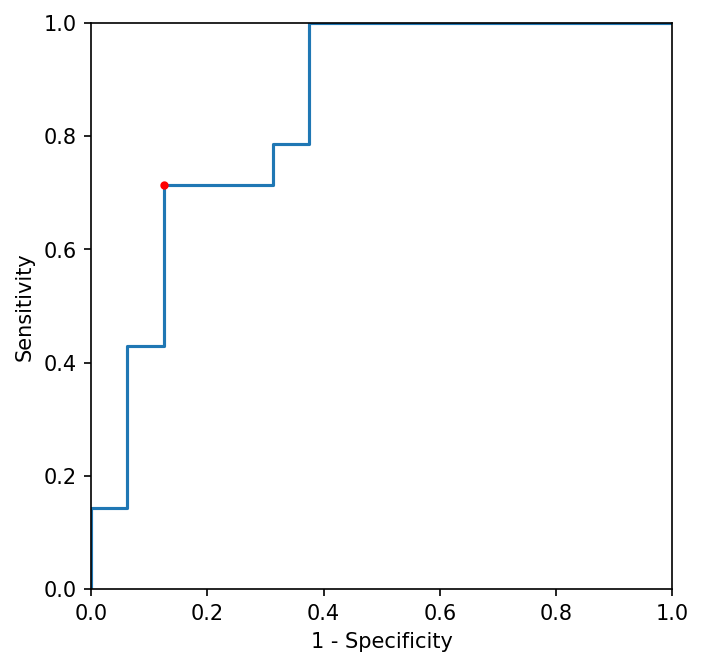

In [102]:
fig, ax = plt.subplots(dpi=150, figsize=(5, 5))
plt.plot(fpr, tpr, '-')
plt.plot(0.125 , 0.71428571, '.', color='red')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.axis([0, 1, 0, 1])

Notice that, in Fig.2 (C), the threshold is reported to be 141, and the AUC=0.8744. Here, we will also calculate the threshold and AUC as follows.

In [103]:
# Select threshold based on ROC curve
threshold = 0.1875*max(val34_roc.MutLoad_Pred)
print("Optimal discrimination threshold:", threshold)

Optimal discrimination threshold: 143.41112937345486


In [104]:
from sklearn.metrics import roc_auc_score
print("AUC =", roc_auc_score(val34_roc.DCB, val34_roc.y_score))

AUC = 0.84375


The threshold based on our results is the same as the authors'. AUC is slightly worse, but similar.

### Immunotherapy response prediction

In [0]:
val34_roc['DCB_pred'] = val34_roc.MutLoad_Pred>threshold

In [0]:
#Classify all the patients into 4 categories: True Positive, False Positive, True Negative and False Negative.
TP = val34_roc.loc[(val34_roc['DCB'] == True) & (val34_roc['DCB_pred'] == True)] #True Positive
FP = val34_roc.loc[(val34_roc['DCB'] == False) & (val34_roc['DCB_pred'] == True)] #False Positive
TN = val34_roc.loc[(val34_roc['DCB'] == False) & (val34_roc['DCB_pred'] == False)] #True Negative
FN = val34_roc.loc[(val34_roc['DCB'] == True) & (val34_roc['DCB_pred'] == False)] #False Negative

[0, 1200, 0, 1200]

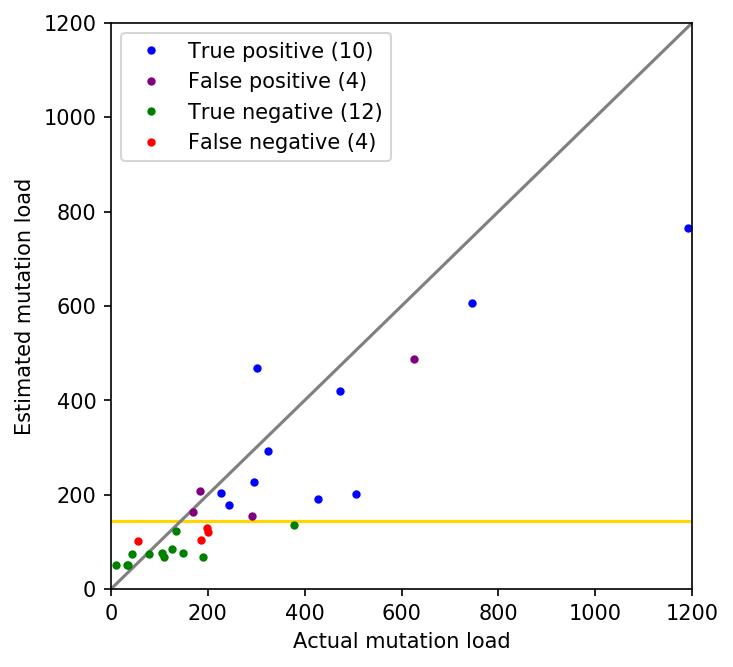

In [107]:
import matplotlib.pyplot as plt

# we make the figure large here to have better resolution in the report
# change the figure in proper size in the report
fig, ax = plt.subplots(dpi=150, figsize=(5, 5))
plt.plot([0, 1200], [0, 1200], linestyle='-', color='gray')  #draw the diagonal

plt.plot(TP['MutLoad'], TP['MutLoad_Pred'], '.', color='blue', 
         label='True positive ({})'.format(str(TP.shape[0]))) 
plt.plot(FP['MutLoad'], FP['MutLoad_Pred'], '.', color='purple', 
         label='False positive ({})'.format(str(FP.shape[0])))
plt.plot(TN['MutLoad'], TN['MutLoad_Pred'], '.', color='green', 
         label='True negative ({})'.format(str(TN.shape[0])))
plt.plot(FN['MutLoad'], FN['MutLoad_Pred'], '.', color='red', 
         label='False negative ({})'.format(str(FN.shape[0])))

plt.hlines(threshold, 0, 1200, colors='gold', linestyles='solid') #draw the threshold line
plt.legend(loc='upper left')
plt.xlabel('Actual mutation load')
plt.ylabel('Estimated mutation load')
plt.axis([0, 1200, 0, 1200])

In [108]:
   #calculate the sensitivity and specificity
sensitivity = TP.shape[0]/(TP.shape[0] + FN.shape[0]) #the probability that a test will indicate 'disease' among those with the disease
sensitivity

specificity = TN.shape[0]/(TN.shape[0] + FP.shape[0]) #the fraction of those without disease who will have a negative test result
specificity

print('The sensitivity and specificity of DCB/NDB classification using our constructed model were shown to be {} and {}, respectively.'.format(sensitivity, specificity))

The sensitivity and specificity of DCB/NDB classification using our constructed model were shown to be 0.7142857142857143 and 0.75, respectively.


## **Elastic net**

### Train an elastic net model with the 65 features pre-filtered

In [134]:
#model training
from sklearn.linear_model import ElasticNetCV
model_elastic=ElasticNetCV(l1_ratio=0.3, alphas = [1, 0.1, 0.001, 0.0005],cv=10).fit(x, y)
#The coefficient of regularization
print('alpha used: {}'.format(model_elastic.alpha_))

alpha used: 0.1


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

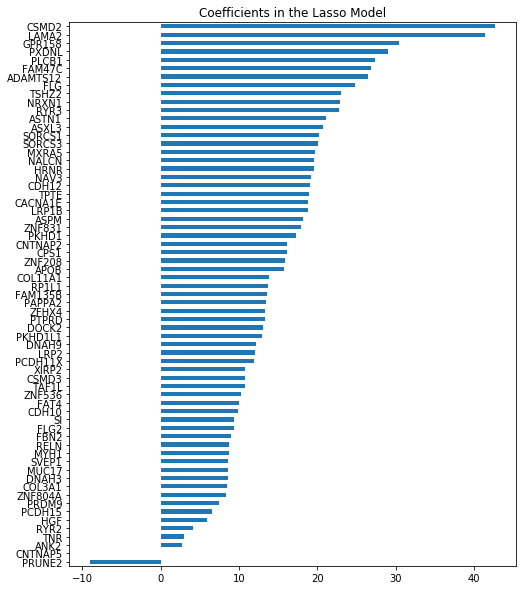

In [136]:
#The coefficients of features
import matplotlib
import matplotlib.pyplot as plt
coef = pd.Series(model_elastic.coef_, index = x.columns)# 
imp_coef = pd.concat([coef.sort_values()])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")   

### Model evaluation

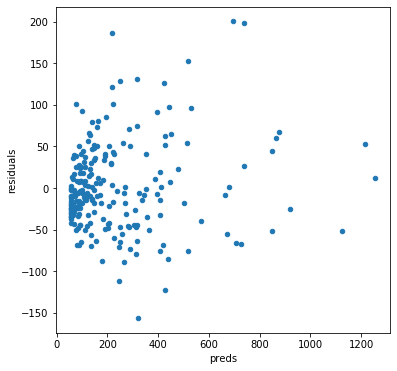

In [138]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":model_elastic.predict(x), "true":y}) 
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

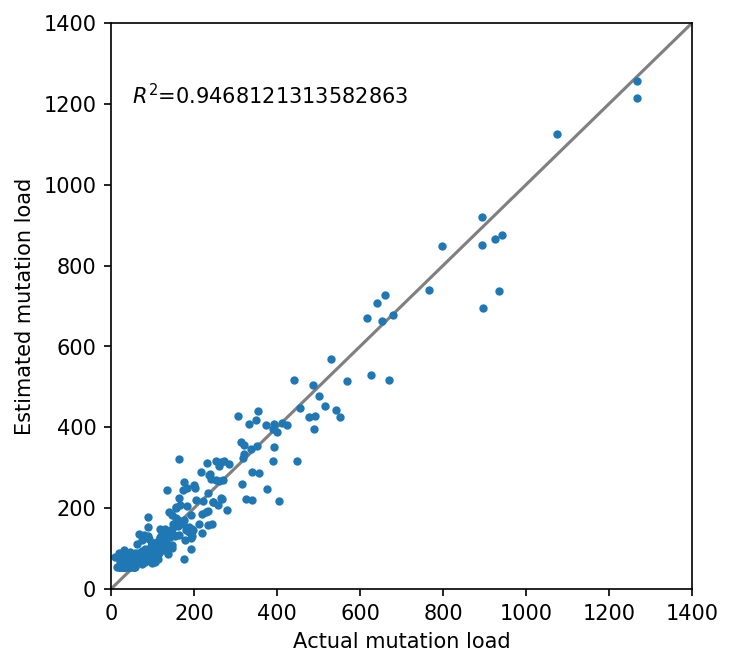

In [139]:
#model performance on the training data
performance_training(model_elastic,x,y)

R2 score of concatenated testing data is 0.799
R2 score of val34 data is 0.687
R2 score of val183 data is 0.808


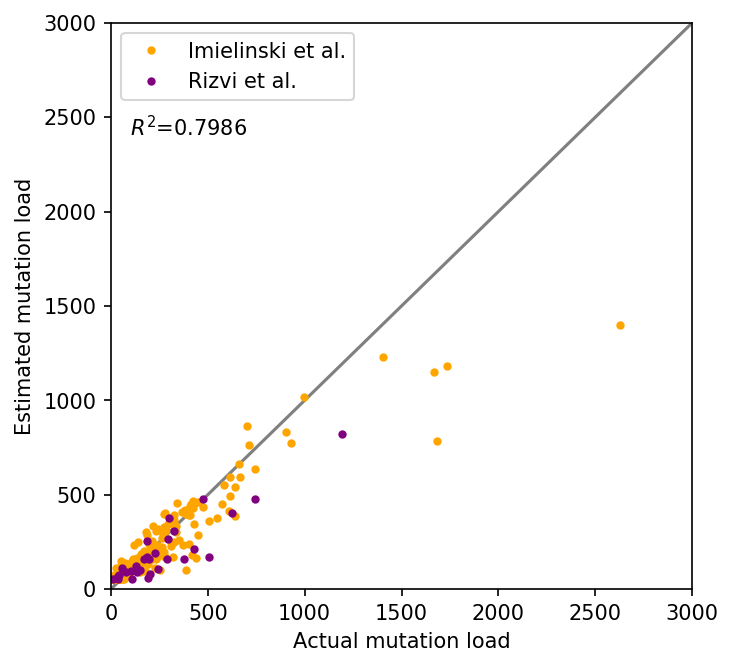

In [140]:
performance_validation(model_elastic)

### Progression-free survial (Fig.2 (b))


In [0]:
val34_pred=model_elastic.predict(val34_model)

In [142]:
# crease a dataframe to store info for pfs plot
val34_df = pd.DataFrame(val34_pred, index=val34_mutmtx.columns, columns=['MutLoad_Pred'])
val34_df['PFS'] = therapy['PFS (mos)']
val34_df['Event'] = therapy['Event']
val34_df = val34_df.sort_values(by=['MutLoad_Pred'])
val34_df = val34_df.dropna()
val34_df.reset_index()

,index,MutLoad_Pred,PFS,Event
0,VA7859,55.593338,6.266667,1
1,LO3793,55.593338,3.500000,1
2,NI9507,55.593338,1.866667,1
3,JB112852,61.099054,3.266667,1
4,AU5884,68.621962,1.833333,1
5,VA1330,72.915210,4.133333,1
6,RH090935,81.861285,10.433333,0
7,LO5004,90.954648,6.300000,1
8,DM123062,93.145815,1.900000,1
9,RO3338,95.004138,2.133333,1


In [143]:
# define high and low estimated mutation load
high_idx = val34_df.MutLoad_Pred>=150

# The authors used log-rank test for this step (see Materials and Methods - Statistical analaysis)
from lifelines.statistics import logrank_test
sta_result = logrank_test(val34_df.PFS[high_idx], val34_df.PFS[~high_idx])
sta_result.p_value

0.008013858374298946

Text(0, 0.5, 'Progression-free survival (%)')

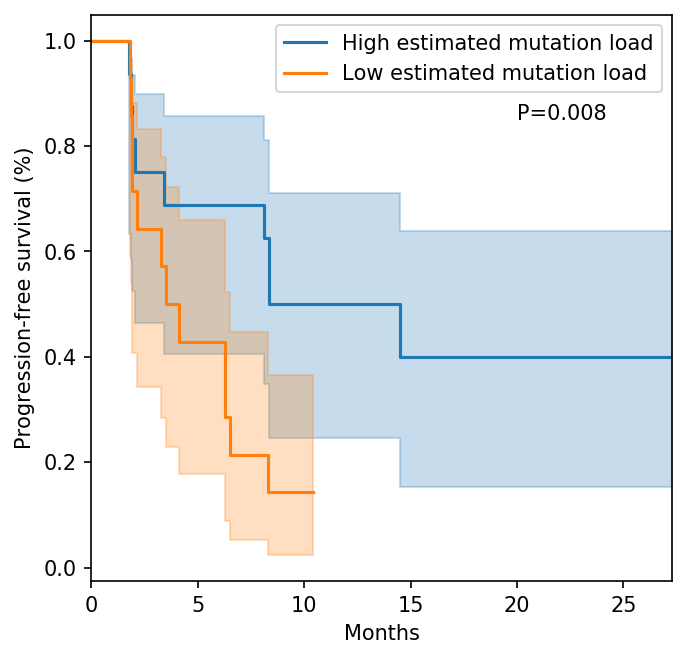

In [144]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=150, figsize=(5, 5))
ax.text(20, 0.85, f"P={round(sta_result.p_value, 4)}")
kmf = KaplanMeierFitter()
kmf.fit(val34_df.PFS[high_idx], val34_df.Event[high_idx], label='High estimated mutation load')
kmf.plot(ax=ax)
kmf.fit(val34_df.PFS[~high_idx], val34_df.Event[~high_idx], label='Low estimated mutation load')
kmf.plot(ax=ax)
plt.xlabel('Months')
plt.ylabel('Progression-free survival (%)')

Our PFS plot looks similar to the authors'. The confidence interval of high estimated mutation load is wide, but it does not overlap too much with low estimated mutation load. The authors did not show confidence interval - theirs could be wide as well. 

### Cox proportional-hazards model
Compare Cox proportional-hazards between using acutual mutation load and mutation load predicted by our model.

In [145]:
# CoxPH summary based on predicted mutation load
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(val34_df, duration_col='PFS', event_col='Event')
cph_sum = cph.summary
cph_sum

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p)
MutLoad_Pred,-0.005079,0.994934,0.002341,-0.009667,-0.000491,0.990379,0.999509,-2.16972,0.030028,5.057546


In [146]:
val34_true = val34_df.drop(['MutLoad_Pred'], axis=1)
val34_true['MutLoad'] = val34_mut_load
val34_true.head()

,PFS,Event,MutLoad
VA7859,6.266667,1,11.0
LO3793,3.500000,1,109.0
NI9507,1.866667,1,35.0
JB112852,3.266667,1,190.0
AU5884,1.833333,1,34.0


In [147]:
# CoxPH summary based on actual mutation load
cph_true = CoxPHFitter()
cph_true.fit(val34_true, duration_col='PFS', event_col='Event')
cph_true.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p)
MutLoad,-0.003968,0.99604,0.001688,-0.007276,-0.00066,0.99275,0.99934,-2.350971,0.018725,5.738928


### ROC curve (Fig.2(c))

ROC curve is used to determine the discrimination threshold of DCB (durable clinical benefit) and NDB (no durable benefit).

In [148]:
val34_roc = pd.DataFrame(val34_pred, index=val34_mutmtx.columns, columns=['MutLoad_Pred'])
val34_roc['MutLoad'] = val34_mut_load
val34_roc['DCB'] = therapy['Durable Clinical Benefit']
val34_roc.DCB[val34_roc.DCB=='NR'] = np.nan
val34_roc = val34_roc.dropna()
val34_roc['y_score'] = val34_roc.MutLoad_Pred/max(val34_roc.MutLoad_Pred)
val34_roc.DCB = val34_roc.DCB=='DCB'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [149]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(val34_roc.DCB, val34_roc.y_score)
np.c_[fpr, tpr, thresholds]

array([[0.        , 0.        , 2.        ],
       [0.        , 0.07142857, 1.        ],
       [0.        , 0.21428571, 0.58290507],
       [0.0625    , 0.21428571, 0.49135868],
       [0.0625    , 0.42857143, 0.3224762 ],
       [0.125     , 0.42857143, 0.30909037],
       [0.125     , 0.71428571, 0.20466756],
       [0.3125    , 0.71428571, 0.19285246],
       [0.3125    , 0.78571429, 0.19105261],
       [0.375     , 0.78571429, 0.14744843],
       [0.375     , 0.92857143, 0.12923231],
       [0.625     , 0.92857143, 0.11083294],
       [0.625     , 1.        , 0.09975221],
       [0.8125    , 1.        , 0.07445236],
       [1.        , 1.        , 0.06774336]])

[0, 1, 0, 1]

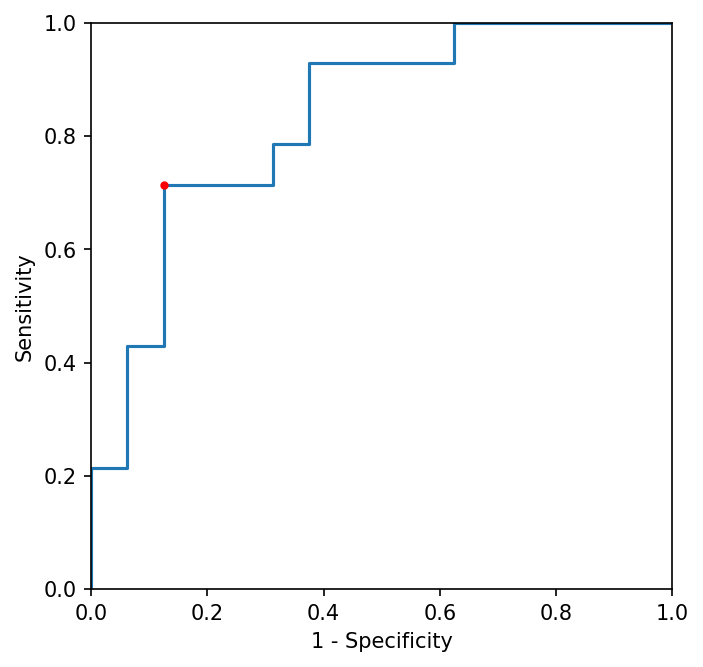

In [150]:
fig, ax = plt.subplots(dpi=150, figsize=(5, 5))
plt.plot(fpr, tpr, '-')
plt.plot(0.125, 0.71428571, '.', color='red')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.axis([0, 1, 0, 1])

Notice that, in Fig.2 (C), the threshold is reported to be 141, and the AUC=0.8744. Here, we will also calculate the threshold and AUC as follows.

In [151]:
# Select threshold based on ROC curve
threshold = 0.125*max(val34_roc.MutLoad_Pred)
print("Optimal discrimination threshold:", threshold)

Optimal discrimination threshold: 102.58078969722266


In [152]:
from sklearn.metrics import roc_auc_score
print("AUC =", roc_auc_score(val34_roc.DCB, val34_roc.y_score))

AUC = 0.8303571428571428


The threshold based on our results is the same as the authors'. AUC is slightly worse, but similar.

### Immunotherapy response prediction

In [153]:
val34_roc['DCB_pred'] = val34_roc.MutLoad_Pred>threshold
val34_roc

,MutLoad_Pred,MutLoad,DCB,y_score,DCB_pred
AL4602,106.054018,244.0,True,0.129232,True
AU5884,68.621962,34.0,False,0.083619,False
BL3403,101.456077,148.0,False,0.123629,False
CA9903,307.344186,324.0,True,0.374515,True
DI6359,191.144626,228.0,True,0.232920,True
DM123062,93.145815,134.0,False,0.113503,False
GR0134,109.348146,56.0,True,0.133246,True
GR4788,159.927352,170.0,False,0.194880,True
HE3202,478.739410,746.0,True,0.583369,True
JB112852,61.099054,190.0,False,0.074452,False


In [0]:
#Classify all the patients into 4 categories: True Positive, False Positive, True Negative and False Negative.
TP = val34_roc.loc[(val34_roc['DCB'] == True) & (val34_roc['DCB_pred'] == True)] #True Positive
FP = val34_roc.loc[(val34_roc['DCB'] == False) & (val34_roc['DCB_pred'] == True)] #False Positive
TN = val34_roc.loc[(val34_roc['DCB'] == False) & (val34_roc['DCB_pred'] == False)] #True Negative
FN = val34_roc.loc[(val34_roc['DCB'] == True) & (val34_roc['DCB_pred'] == False)] #False Negative

[0, 1200, 0, 1200]

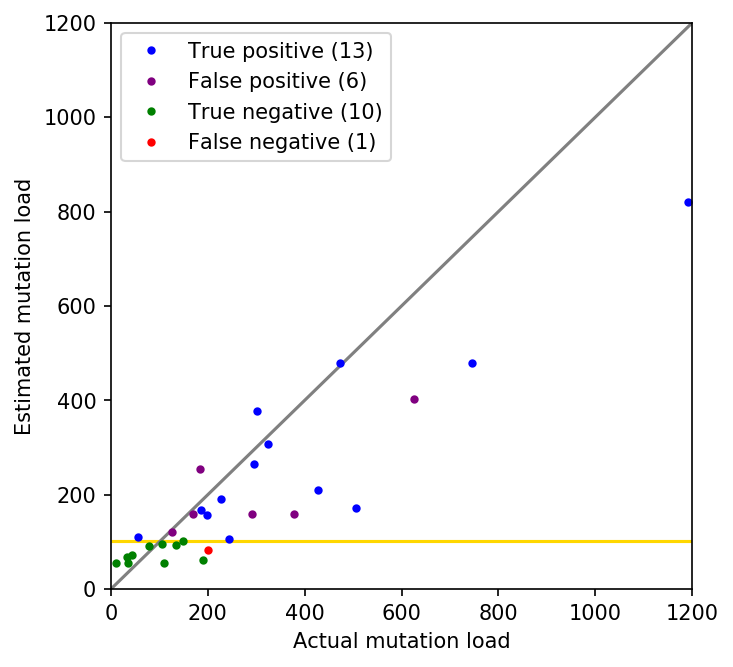

In [155]:
import matplotlib.pyplot as plt

# we make the figure large here to have better resolution in the report
# change the figure in proper size in the report
fig, ax = plt.subplots(dpi=150, figsize=(5, 5))
plt.plot([0, 1200], [0, 1200], linestyle='-', color='gray')  #draw the diagonal

plt.plot(TP['MutLoad'], TP['MutLoad_Pred'], '.', color='blue', 
         label='True positive ({})'.format(str(TP.shape[0]))) 
plt.plot(FP['MutLoad'], FP['MutLoad_Pred'], '.', color='purple', 
         label='False positive ({})'.format(str(FP.shape[0])))
plt.plot(TN['MutLoad'], TN['MutLoad_Pred'], '.', color='green', 
         label='True negative ({})'.format(str(TN.shape[0])))
plt.plot(FN['MutLoad'], FN['MutLoad_Pred'], '.', color='red', 
         label='False negative ({})'.format(str(FN.shape[0])))

plt.hlines(threshold, 0, 1200, colors='gold', linestyles='solid') #draw the threshold line
plt.legend(loc='upper left')
plt.xlabel('Actual mutation load')
plt.ylabel('Estimated mutation load')
plt.axis([0, 1200, 0, 1200])

In [156]:
   #calculate the sensitivity and specificity
sensitivity = TP.shape[0]/(TP.shape[0] + FN.shape[0]) #the probability that a test will indicate 'disease' among those with the disease
sensitivity

specificity = TN.shape[0]/(TN.shape[0] + FP.shape[0]) #the fraction of those without disease who will have a negative test result
specificity

print('The sensitivity and specificity of DCB/NDB classification using our constructed model were shown to be {} and {}, respectively.'.format(sensitivity, specificity))

The sensitivity and specificity of DCB/NDB classification using our constructed model were shown to be 0.9285714285714286 and 0.625, respectively.
